In [1]:
import numpy as np
import math
from matplotlib import pylab as plt
# from ROOT import TTree, TFile, TH2D, TCanvas, TH1F, gROOT
# from root_numpy import array2hist, hist2array, fill_hist, tree2array, root2array, list_trees
import pandas as pd
# from root_pandas import read_root
# import uproot
import time
from mpl_toolkits.mplot3d import Axes3D # <--- This is important for 3d plotting 
import uproot
from scipy import stats

In [2]:
filenames_g=[
            "/work/lb8075/PhaseSpaces/PhS2_40x40_p1_Elec_v2/Skimmed_output*.root"
]


data_frame_dict={}

for files_g in filenames_g:
    print(f"{files_g}   \n")
    ur=uproot.pandas.iterate(files_g, "PhaseSpace", ['X','Y','dX','dY','dZ','Ekine'])
    #This creates a set of dataframes for each files as it iterates through the * wildcards
    mylist=list(ur)        
    data_frame_dict[files_g]=pd.concat(mylist, ignore_index=True, sort=False  ,copy = False)
    #The concat method then stitches all the pandas data frames for each file together into one data frame
    #which is then stored in a dictionary, accessed by the the key files_g, whatever the filename is



/work/lb8075/PhaseSpaces/PhS2_40x40_p1_Elec_v2/Skimmed_output*.root   



In [3]:
# data_frame_dict[files_g]['Z'].hist()

In [4]:
for files_g in filenames_g:
    print(data_frame_dict[files_g])

                   X          Y        dX        dY        dZ     Ekine
0          82.781898  44.251480  0.529525 -0.761656 -0.373475  0.838189
1         -62.340248  -3.633132 -0.187345 -0.140106 -0.972251  0.123098
2          44.804558 -25.360569  0.103621 -0.063042 -0.992617  5.650195
3         -21.352638 -90.427437 -0.068489 -0.163184 -0.984216  1.561793
4         -40.672119  38.231785  0.314169  0.112664 -0.942658  0.790718
...              ...        ...       ...       ...       ...       ...
54550028   95.942749 -22.321810  0.434169 -0.293684 -0.851614  1.669700
54550029   20.255283  -5.819820 -0.267727 -0.200952 -0.942306  0.049273
54550030   24.513884  -7.854311  0.360728  0.791067 -0.494053  0.016511
54550031   44.636482 -80.681488  0.137970 -0.020687 -0.990220  1.247485
54550032  109.549065 -10.012312  0.478056 -0.065346 -0.875895  0.908241

[54550033 rows x 6 columns]


In [5]:
# pd.set_option('mode.use_inf_as_na', True)
# dfe10tot.index[np.isinf(dfe10tot).any(1)]
# # dfe10tot.loc[[129168038]]
# dfe10tot=dfe10tot.dropna()

In [6]:
for files_g in filenames_g:
    df=data_frame_dict[files_g]
    nparr=df.to_numpy()
    values=nparr.T
values

array([[ 8.27818985e+01, -6.23402481e+01,  4.48045578e+01, ...,
         2.45138836e+01,  4.46364822e+01,  1.09549065e+02],
       [ 4.42514801e+01, -3.63313198e+00, -2.53605690e+01, ...,
        -7.85431099e+00, -8.06814880e+01, -1.00123119e+01],
       [ 5.29524863e-01, -1.87345013e-01,  1.03621431e-01, ...,
         3.60728323e-01,  1.37969822e-01,  4.78056043e-01],
       [-7.61655927e-01, -1.40106484e-01, -6.30419180e-02, ...,
         7.91066825e-01, -2.06869096e-02, -6.53462410e-02],
       [-3.73475075e-01, -9.72250998e-01, -9.92616892e-01, ...,
        -4.94053006e-01, -9.90220368e-01, -8.75895143e-01],
       [ 8.38188589e-01,  1.23098396e-01,  5.65019512e+00, ...,
         1.65112261e-02,  1.24748468e+00,  9.08241391e-01]], dtype=float32)

In [17]:
bandwidth=0.02

In [18]:
kde = stats.gaussian_kde(values,bw_method=bandwidth)

In [19]:
newsample = stats.gaussian_kde.resample(kde,32000000)


In [21]:
newdf=pd.DataFrame(newsample.T,columns=['X','Y','dX','dY','dZ','Ekine'])

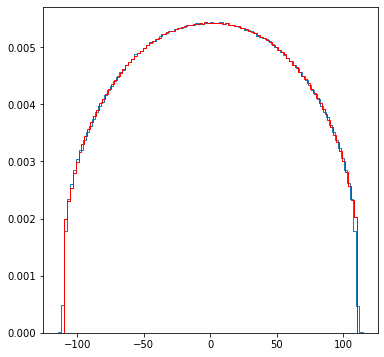

In [22]:
plt.figure(figsize=(6,6))
_=plt.hist(newdf['X'],bins=100,histtype='step',density=True)
_=plt.hist(df['X'],bins=100,histtype='step',color='red',density=True)

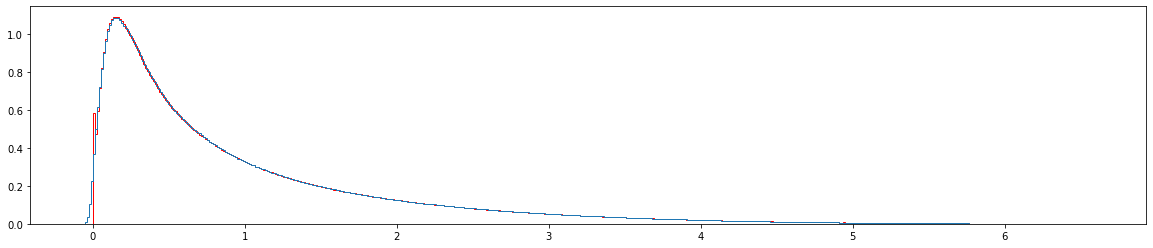

In [23]:
plt.figure(figsize=(20,4))
_=plt.hist(df['Ekine'],bins=500,histtype='step',color='red',density=True)
_=plt.hist(newdf['Ekine'],bins=500,histtype='step',density=True)

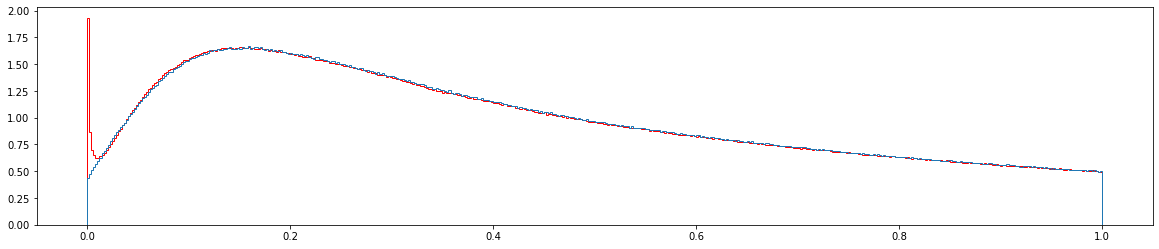

In [24]:
plt.figure(figsize=(20,4))
_=plt.hist(df['Ekine'],bins=500,histtype='step',color='red',density=True,range=(0,1))
_=plt.hist(newdf['Ekine'],bins=500,histtype='step',density=True,range=(0,1))


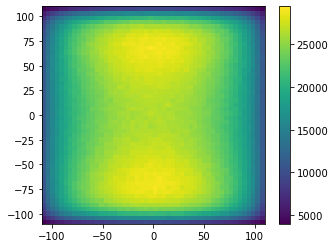

In [25]:
plt.figure(figsize=(5,4))
_=plt.hist2d(df['X'],df['Y'],bins=(50,50))
plt.colorbar()


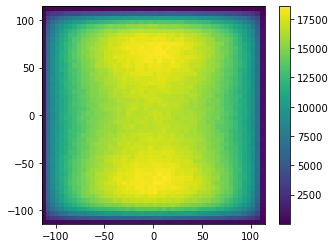

In [26]:
plt.figure(figsize=(5,4))
_=plt.hist2d(newdf['X'],newdf['Y'],bins=(50,50))
plt.colorbar()


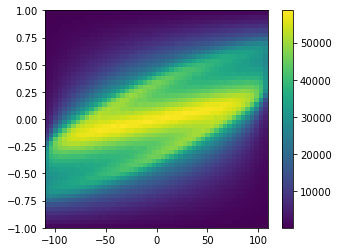

In [27]:
plt.figure(figsize=(5,4))
_=plt.hist2d(df['X'],df['dX'],bins=(50,50),range=((-110,110),(-1,1)))
plt.colorbar()

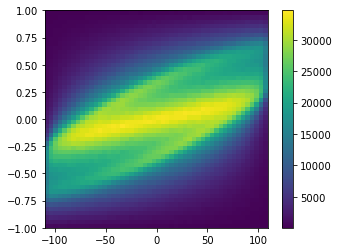

In [28]:
plt.figure(figsize=(5,4))
_=plt.hist2d(newdf['X'],newdf['dX'],bins=(50,50),range=((-110,110),(-1,1)))
plt.colorbar()

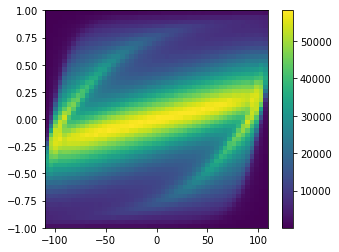

In [29]:
plt.figure(figsize=(5,4))
_=plt.hist2d(df['Y'],df['dY'],bins=(50,50),range=((-110,110),(-1,1)))
plt.colorbar()

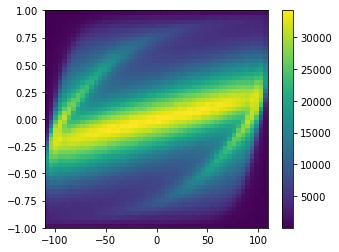

In [30]:
plt.figure(figsize=(5,4))
_=plt.hist2d(newdf['Y'],newdf['dY'],bins=(50,50),range=((-110,110),(-1,1)))
plt.colorbar()

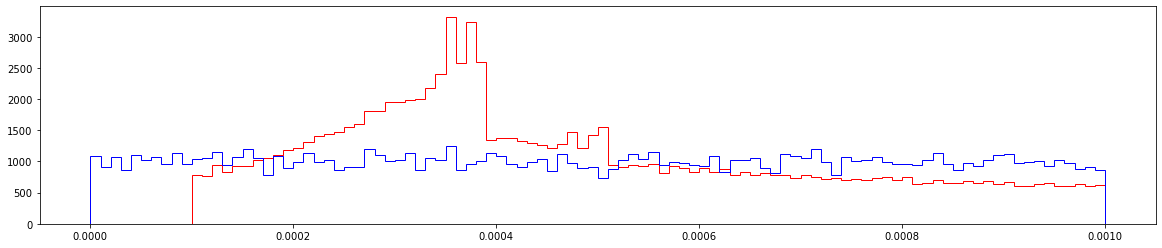

In [31]:
plt.figure(figsize=(20,4))
_=plt.hist(df['Ekine'],bins=100,histtype='step',color='red',density=True,range=(0,0.001))
_=plt.hist(newdf['Ekine'],bins=100,histtype='step',color='blue',density=True,range=(0,0.001))


In [7]:
bandwidth=0.025

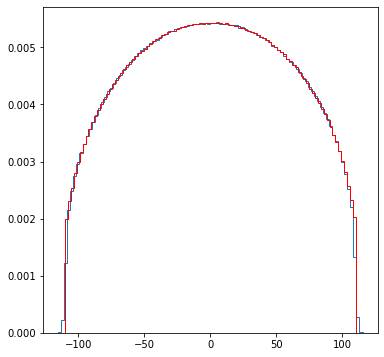

In [8]:
kde = stats.gaussian_kde(values,bw_method=bandwidth)
newsample = stats.gaussian_kde.resample(kde,32000000)
newdf=pd.DataFrame(newsample.T,columns=['X','Y','dX','dY','dZ','Ekine'])
plt.figure(figsize=(6,6))
_=plt.hist(newdf['X'],bins=100,histtype='step',density=True)
_=plt.hist(df['X'],bins=100,histtype='step',color='red',density=True)

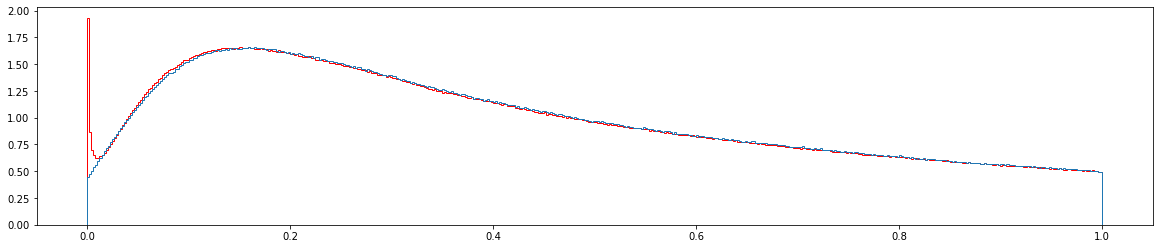

In [9]:
plt.figure(figsize=(20,4))
_=plt.hist(df['Ekine'],bins=500,histtype='step',color='red',density=True,range=(0,1))
_=plt.hist(newdf['Ekine'],bins=500,histtype='step',density=True,range=(0,1))

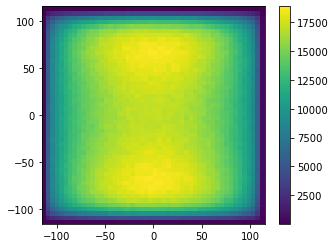

In [10]:
plt.figure(figsize=(5,4))
_=plt.hist2d(newdf['X'],newdf['Y'],bins=(50,50))
plt.colorbar()
